In [1]:
import os
import joblib
import pickle
from IPython.display import Audio


import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import plotly_express as px
import seaborn as sns
import tensorflow as tf
tf.config.experimental_run_functions_eagerly(True)


from plotly.subplots import make_subplots
import plotly.graph_objects as go


from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report,accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.utils import compute_class_weight


from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from tensorflow.keras.layers import Dense, Dropout , BatchNormalization
# from tensorflow.keras.utils import np_utils
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


print(tf.__version__)


import autosklearn.classification
import sklearn.model_selection
from supervised.automl import AutoML


Instructions for updating:
Use `tf.config.run_functions_eagerly` instead of the experimental version.
2.5.0
/home/sebastien/miniconda3/envs/Projets/lib/python3.7/site-packages/pyparsing.py:3190: FutureWarning: Possible set intersection at position 3
  self.re = re.compile(self.reString)


In [2]:
split_rate = 0.2
seed = 42
n_cores = int(os.cpu_count()/2)
print(f'The half of the number of threads available is : {n_cores}')

The half of the number of threads available is : 8


In [3]:
df = pd.read_csv('pd_speech_features.csv', header=1)
df.set_index("id", inplace = True)
df

,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,locAbsJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
id,,,,,,,,,,,,,,,,,,,,,
0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,0.000018,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,0.000016,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,0.000015,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,0.000046,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,0.000044,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,0,0.80903,0.56355,0.28385,417,416,0.004627,0.000052,0.00064,0.000003,...,3.0706,3.0190,3.1212,2.4921,3.5844,3.5400,3.3805,3.2003,6.8671,0
250,0,0.16084,0.56499,0.59194,415,413,0.004550,0.000220,0.00143,0.000006,...,1.9704,1.7451,1.8277,2.4976,5.2981,4.2616,6.3042,10.9058,28.4170,0
251,0,0.88389,0.72335,0.46815,381,380,0.005069,0.000103,0.00076,0.000004,...,51.5607,44.4641,26.1586,6.3076,2.8601,2.5361,3.5377,3.3545,5.0424,0


# EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 756 entries, 0 to 251
Columns: 754 entries, gender to class
dtypes: float64(749), int64(5)
memory usage: 4.4 MB


In [5]:
df.head()

,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,locAbsJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
id,,,,,,,,,,,,,,,,,,,,,
0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,0.000018,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,0.000016,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,0.000015,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,0.000046,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,0.000044,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1


In [6]:
df.describe()

,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,locAbsJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
count,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,7.560000e+02,...,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000
mean,0.515873,0.746284,0.700414,0.489058,323.972222,322.678571,0.006360,0.000383,0.002324,1.673391e-05,...,26.237251,22.840337,18.587888,13.872018,12.218953,12.375335,14.799230,14.751559,31.481110,0.746032
std,0.500079,0.169294,0.069718,0.137442,99.219059,99.402499,0.001826,0.000728,0.002628,2.290134e-05,...,42.220693,32.626464,25.537464,20.046029,17.783642,16.341665,15.722502,14.432979,34.230991,0.435568
min,0.000000,0.041551,0.543500,0.154300,2.000000,1.000000,0.002107,0.000011,0.000210,6.860000e-07,...,1.509800,1.531700,1.582900,1.747200,1.789500,1.628700,1.861700,1.955900,2.364000,0.000000
25%,0.000000,0.762833,0.647053,0.386537,251.000000,250.000000,0.005003,0.000049,0.000970,5.260000e-06,...,2.408675,3.452800,3.354825,3.077450,2.937025,3.114375,3.665925,3.741275,3.948750,0.000000
50%,1.000000,0.809655,0.700525,0.484355,317.000000,316.000000,0.006048,0.000077,0.001495,9.530000e-06,...,5.586300,7.062750,6.077400,4.770850,4.300450,4.741450,6.725700,7.334250,10.637250,1.000000
75%,1.000000,0.834315,0.754985,0.586515,384.250000,383.250000,0.007528,0.000171,0.002520,1.832500e-05,...,28.958075,29.830850,21.944050,13.188000,10.876150,12.201325,21.922050,22.495175,61.125325,1.000000
max,1.000000,0.907660,0.852640,0.871230,907.000000,905.000000,0.012966,0.003483,0.027750,2.564800e-04,...,239.788800,203.311300,121.542900,102.207000,85.571700,73.532200,62.007300,57.544300,156.423700,1.000000


In [7]:
print(f'Number of duplicated columns : {df.columns.duplicated().sum()}')

df = df.loc[:,~df.columns.duplicated()] # drop duplicated columns if present

Number of duplicated columns : 0


In [8]:
df.apply(lambda x: sum(x.isnull()),axis=0) # Checking for missing values

gender                       0
PPE                          0
DFA                          0
RPDE                         0
numPulses                    0
                            ..
tqwt_kurtosisValue_dec_33    0
tqwt_kurtosisValue_dec_34    0
tqwt_kurtosisValue_dec_35    0
tqwt_kurtosisValue_dec_36    0
class                        0
Length: 754, dtype: int64

In [9]:
df=df.sample(frac=1).reset_index(drop=True)# Resample data
df.head()

,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,locAbsJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,0.000018,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,0.82407,0.79658,0.45866,336,335,0.005749,0.000070,0.00206,0.000012,...,45.8369,16.1715,4.7049,3.0694,2.6327,2.8711,4.4712,4.3862,3.7338,1
2,1,0.83536,0.71129,0.57576,330,329,0.005852,0.000187,0.00079,0.000005,...,17.6453,30.4365,27.8132,16.6158,7.7800,10.9973,31.7664,37.2141,92.7991,1
3,0,0.81603,0.58595,0.28966,547,546,0.003529,0.000051,0.00106,0.000004,...,148.1075,103.6630,46.8993,30.0964,26.4827,9.4118,5.0814,8.5347,25.2181,0
4,0,0.81733,0.77541,0.60502,439,438,0.004399,0.000049,0.00221,0.000010,...,4.2896,4.7668,3.7170,2.8712,3.0748,3.1143,13.2031,29.5646,69.2751,1


In [10]:
fig = px.histogram(df, x = 'class', color = 'gender', barmode = 'group', title = 'Class repartition betwenn genders')
fig.show()
print(f'Unbalanced data')

Unbalanced data


In [11]:
classes_weights = compute_class_weight('balanced', classes = np.unique(df['class'].values), y = df['class'].values)
print(classes_weights)

[1.96875    0.67021277]


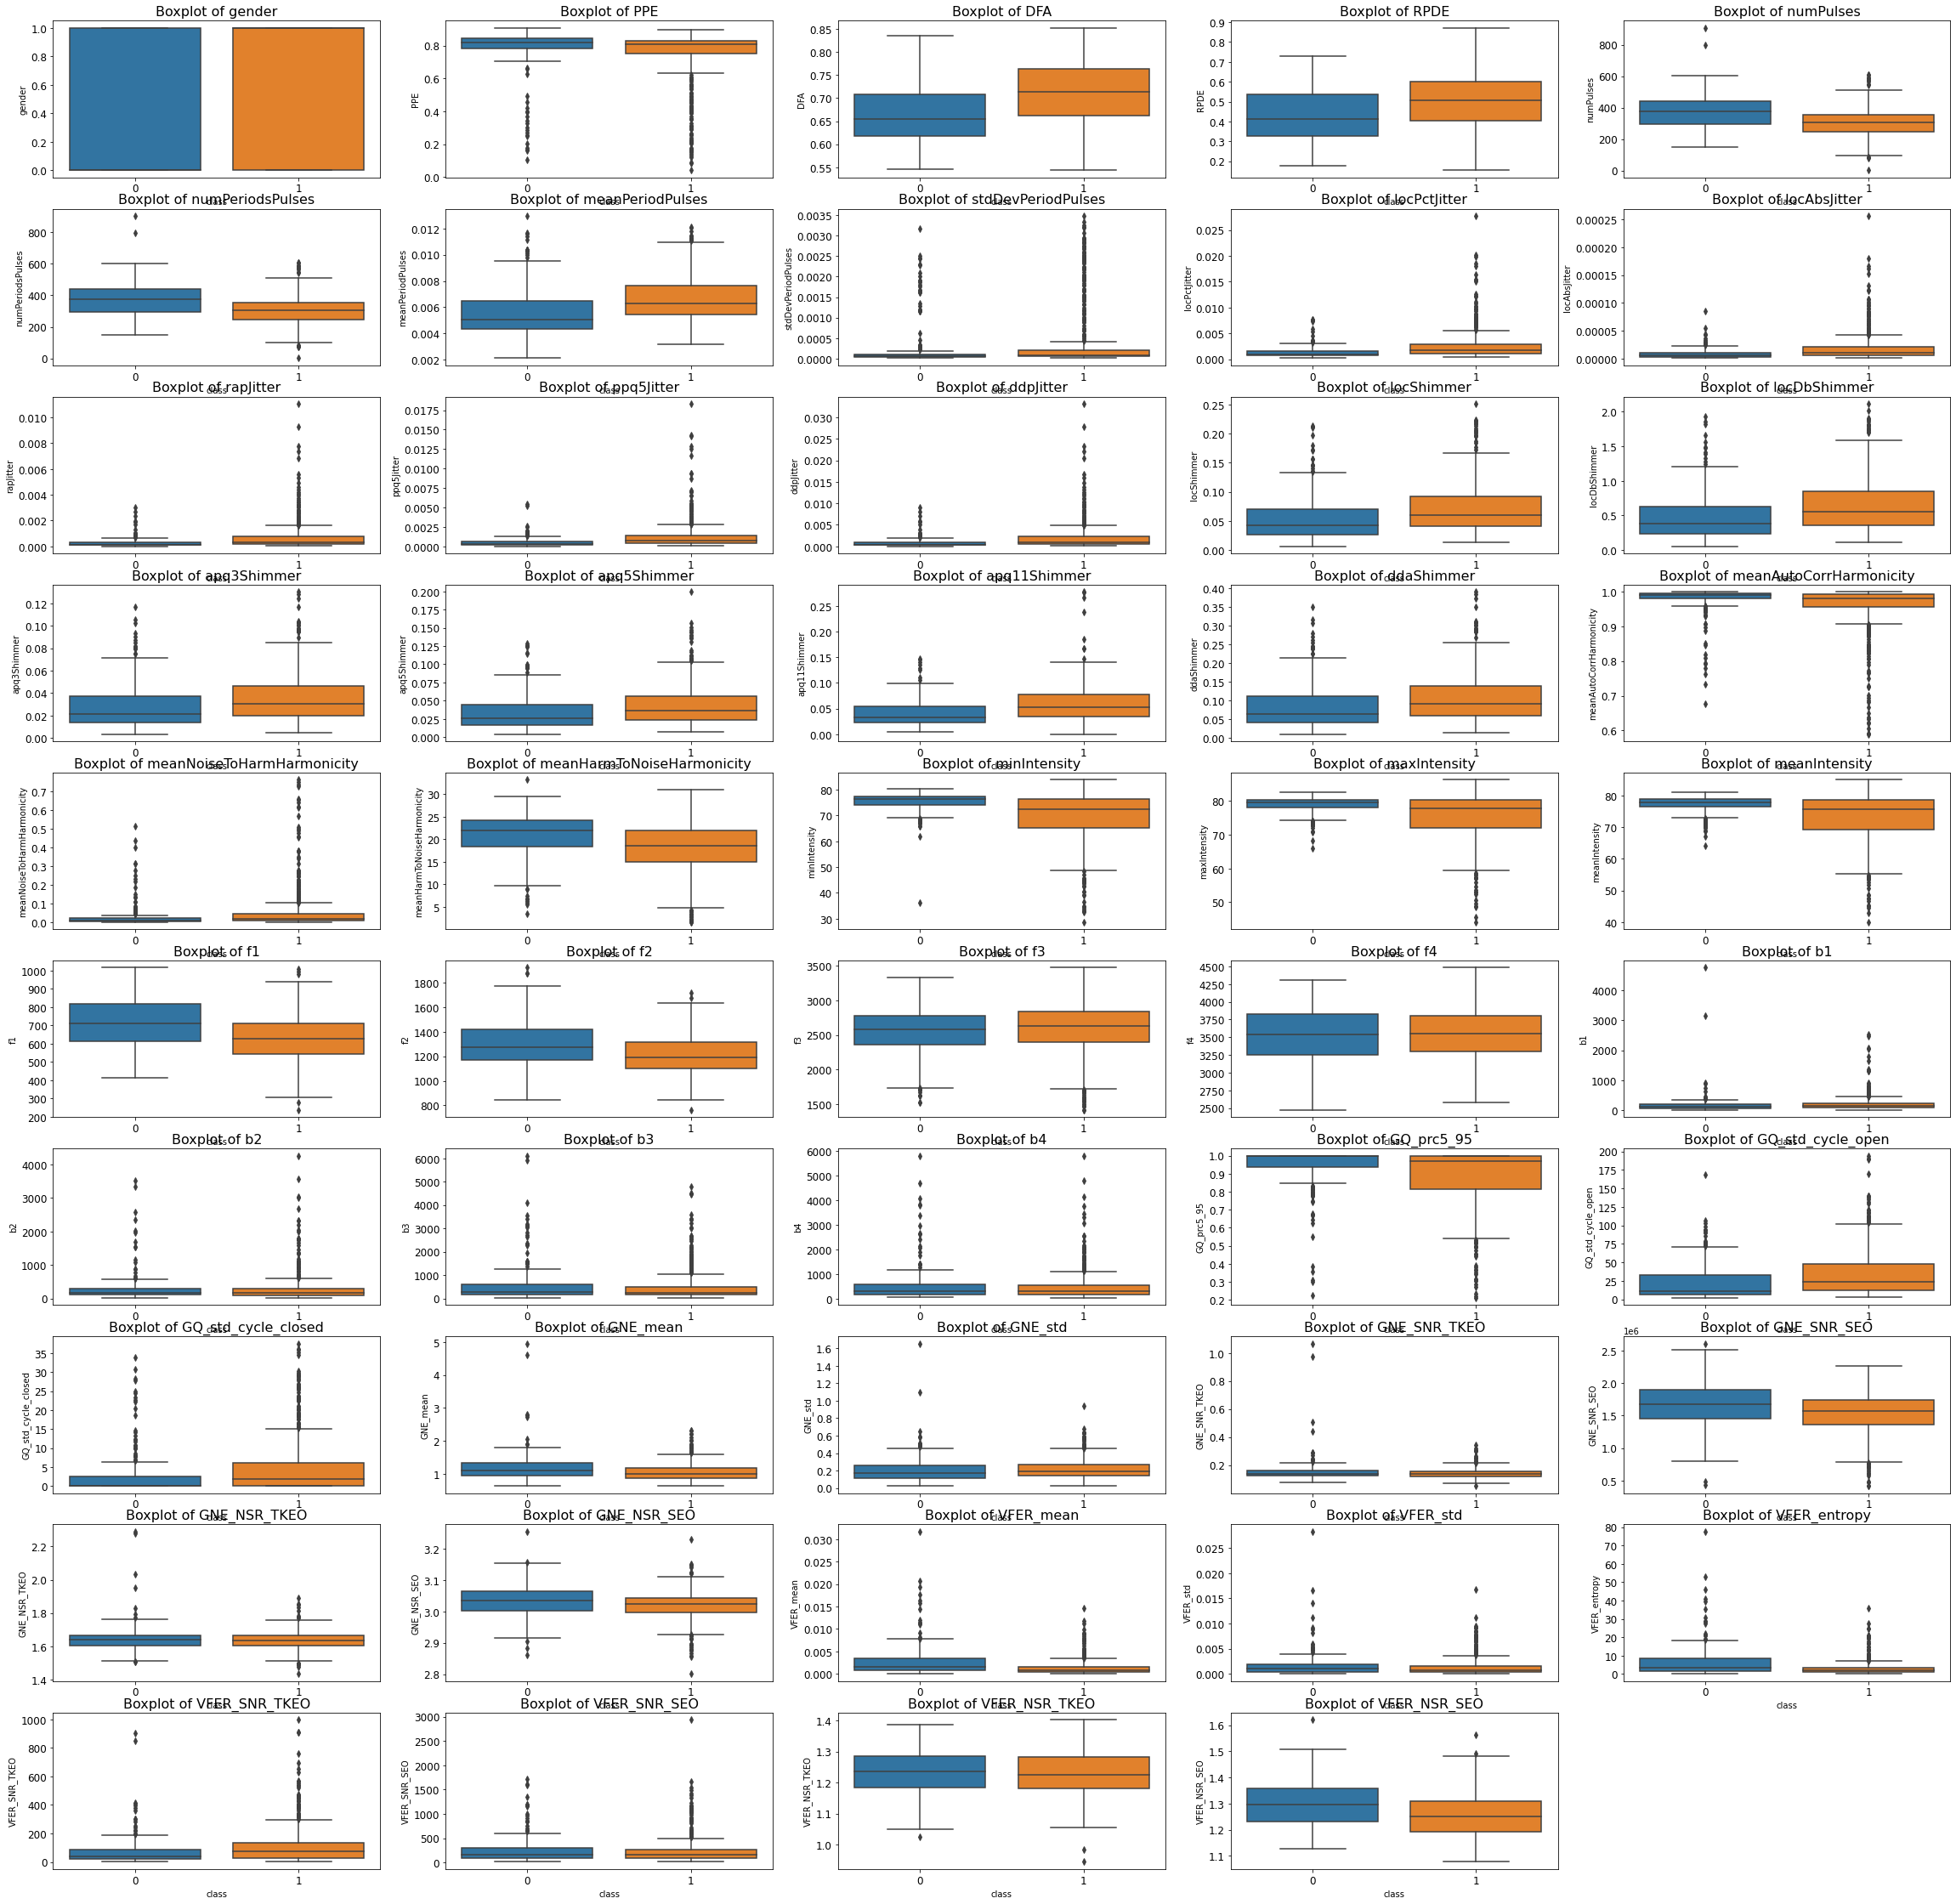

In [12]:
#Box Plotting All features distribution corresponding Target column
plt.figure(figsize=(40,40))
for idx, c in enumerate(df.columns[:49]):
    plt.subplot(10,5,idx+1)
    plt.title(f"Boxplot of {c}",fontsize=16)
    plt.yticks(fontsize=12)
    plt.xticks(fontsize=12)
    sns.boxplot(y=df[c],x=df['class'])
plt.show()

# Machine Learning

## Data Splitting

In [13]:
features = df.drop('class', axis=1)
labels = df['class']

In [14]:
print(f'Shape of features : {features.shape}')
print(f'Shape of labels : {labels.shape}')

Shape of features : (756, 753)
Shape of labels : (756,)


In [15]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = split_rate, random_state = seed, stratify = labels)

In [16]:
print(f'Shape of X_train : {X_train.shape}')
print(f'Shape of y_train : {y_train.shape}')

print(f'Shape of X_test : {X_test.shape}')
print(f'Shape of y_test : {y_test.shape}')

Shape of X_train : (604, 753)
Shape of y_train : (604,)
Shape of X_test : (152, 753)
Shape of y_test : (152,)


In [17]:
# X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size = 0.2, random_state = seed)

In [18]:
# print(f'Shape of X_test : {X_test.shape}')
# print(f'Shape of y_test : {y_test.shape}')

# print(f'Shape of X_val : {X_val.shape}')
# print(f'Shape of y_val : {y_val.shape}')


## Scaling Data

In [19]:
scaler = StandardScaler() # Substract mean and divide by standard deviation

df_scaled = scaler.fit_transform(df.drop('class', axis  = 1))

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
#X_val = scaler.fit_transform(X_val)

### Logistic Regression

In [20]:
LR_classifier = LogisticRegression(random_state = seed)
scoring = ['accuracy','balanced_accuracy', 'f1','roc_auc']

LR_parameters = [{ 'penalty' : ['l1','l2'],
                    'class_weight' : [None, 'balanced'],
                    'C' : [0.01,0.1,1.0,2.0,5.0,10.0],
                    'solver' : ['liblinear','newton-cg','lbfgs','saga'],
                    'max_iter' : [100,200,500]}]

LR_grid_search = GridSearchCV(estimator = LR_classifier, param_grid = LR_parameters, scoring = 'accuracy', cv = 5, n_jobs = n_cores, verbose = 4)
LR_grid_search = LR_grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
/home/sebastien/miniconda3/envs/Projets/lib/python3.7/site-packages/sklearn/model_selection/_search.py:925: UserWarning:

One or more of the test scores are non-finite: [0.74669421        nan        nan 0.74669421 0.81618457 0.85931129
 0.85931129 0.85599174 0.74669421        nan        nan 0.74669421
 0.81618457 0.85931129 0.85931129 0.8576584  0.74669421        nan
        nan 0.74669421 0.81618457 0.85931129 0.85931129 0.85931129
 0.67559229        nan        nan 0.71692837 0.78800275 0.82782369
 0.82782369 0.80790634 0.67559229        nan        nan 0.71526171
 0.78800275 0.82782369 0.82782369 0.8162259  0.67559229        nan
        nan 0.71694215 0.78800275 0.82782369 0.82782369 0.82782369
 0.84275482        nan        nan 0.86261708 0.8211708  0.84108815
 0.84108815 0.83110193 0.84275482        nan        nan 0.85601928
 0.8211708  0.84108815 0.84108815 0.8427135  0.84275482        nan
        nan 0.8461157  0.82117

In [21]:
print(f'Best logistic regressor is : {LR_grid_search.best_estimator_}, \n  with a score of : {LR_grid_search.best_score_}')


Best logistic regressor is : LogisticRegression(C=0.1, penalty='l1', random_state=42, solver='saga'), 
  with a score of : 0.8626170798898072


In [22]:
y_pred_LR =  LR_grid_search.best_estimator_.predict(X_test)

cm = confusion_matrix(y_test, y_pred_LR) 
print (cm)

print(classification_report(y_test,y_pred_LR))
print("Accuracy:",accuracy_score(y_test, y_pred_LR)*100)

[[ 25  14]
 [  8 105]]
              precision    recall  f1-score   support

           0       0.76      0.64      0.69        39
           1       0.88      0.93      0.91       113

    accuracy                           0.86       152
   macro avg       0.82      0.79      0.80       152
weighted avg       0.85      0.86      0.85       152

Accuracy: 85.52631578947368


### SVM

In [23]:
SVM_classifier = SVC(random_state = seed)
scoring = ['accuracy','balanced_accuracy', 'f1','roc_auc']

SVM_parameters = [{ 'kernel' : ['linear','poly','rbf','sigmoid'],
                    'class_weight' : [None, 'balanced'],
                    'C' : [0.01,0.1,1.0,2.0,5.0,10.0],
                    'decision_function_shape' : ['ovo','ovr']}]

SVM_grid_search = GridSearchCV(estimator = SVM_classifier, param_grid = SVM_parameters, scoring = 'accuracy', cv = 5, n_jobs = n_cores, verbose = 4)
SVM_grid_search = SVM_grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


In [24]:
print(f'Best SVM is : {SVM_grid_search.best_estimator_}, \n  with a score of : {SVM_grid_search.best_score_}')


Best SVM is : SVC(C=2.0, decision_function_shape='ovo', random_state=42), 
  with a score of : 0.8708815426997244


In [25]:
y_pred_SVM =  SVM_grid_search.best_estimator_.predict(X_test)

cm = confusion_matrix(y_test, y_pred_SVM) 
print (cm)

print(classification_report(y_test,y_pred_SVM))
print("Accuracy:",accuracy_score(y_test, y_pred_SVM)*100)

[[ 21  18]
 [  2 111]]
              precision    recall  f1-score   support

           0       0.91      0.54      0.68        39
           1       0.86      0.98      0.92       113

    accuracy                           0.87       152
   macro avg       0.89      0.76      0.80       152
weighted avg       0.87      0.87      0.86       152

Accuracy: 86.8421052631579


### Gaussian Naive Bayes

In [26]:
GNB_classifier = GaussianNB()
GNB_grid_search = GNB_classifier.fit(X_train, y_train)

In [27]:
y_pred_GNB =  GNB_classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred_GNB) 
print (cm)

print(classification_report(y_test,y_pred_GNB))
print("Accuracy:",accuracy_score(y_test, y_pred_GNB)*100)

[[26 13]
 [26 87]]
              precision    recall  f1-score   support

           0       0.50      0.67      0.57        39
           1       0.87      0.77      0.82       113

    accuracy                           0.74       152
   macro avg       0.69      0.72      0.69       152
weighted avg       0.78      0.74      0.75       152

Accuracy: 74.3421052631579


### Decision Tree

In [28]:
DT_classifier = DecisionTreeClassifier(random_state = seed)
scoring = ['accuracy','balanced_accuracy', 'f1','roc_auc']

DT_parameters = [{ 'criterion' : ['gini','entropy'],
                    'class_weight' : [None, 'balanced'],
                    'splitter' : ['best','random'],
                    'max_depth' : [10,20,50,100,1000],
                    'min_samples_split' : [10,15,20,50],
                    'max_features' : ['auto', 'sqrt', 'log2']
                    }]

DT_grid_search = GridSearchCV(estimator = DT_classifier, param_grid = DT_parameters, scoring = 'accuracy', cv = 5, n_jobs = n_cores, verbose = 4)
DT_grid_search = DT_grid_search.fit(X_train, y_train)
print('DT trained')

Fitting 5 folds for each of 480 candidates, totalling 2400 fits
DT trained


In [29]:
print(f'Best Decison Tree is : {DT_grid_search.best_estimator_}, \n  with a score of : {DT_grid_search.best_score_}')
print('\n')

y_pred_DT =  DT_grid_search.best_estimator_.predict(X_test)

cm = confusion_matrix(y_test, y_pred_DT) 
print (cm)

print(classification_report(y_test,y_pred_DT))
print("Accuracy:",accuracy_score(y_test, y_pred_DT)*100)

Best Decison Tree is : DecisionTreeClassifier(max_depth=20, max_features='auto', min_samples_split=10,
                       random_state=42), 
  with a score of : 0.8063223140495868


[[25 14]
 [47 66]]
              precision    recall  f1-score   support

           0       0.35      0.64      0.45        39
           1       0.82      0.58      0.68       113

    accuracy                           0.60       152
   macro avg       0.59      0.61      0.57       152
weighted avg       0.70      0.60      0.62       152

Accuracy: 59.86842105263158


### Random Forest

In [30]:
RF_classifier = RandomForestClassifier(random_state = seed)
scoring = ['accuracy','balanced_accuracy', 'f1','roc_auc']

RF_parameters = [{ 'n_estimators' : [10,20,50,100,250,500],
                    'class_weight' : [None, 'balanced'],
                    'criterion' : ['gini', 'entropy'],
                    'max_depth' : [10,20,50,100,1000],
                    'min_samples_split' : [10,15,20,50],
                    'max_features' : ['auto', 'sqrt', 'log2']
                    }]

RF_grid_search = GridSearchCV(estimator = RF_classifier, param_grid = RF_parameters, scoring = 'accuracy', cv = 5, n_jobs = n_cores, verbose = 4)
RF_grid_search = RF_grid_search.fit(X_train, y_train)
print('RF trained')




Fitting 5 folds for each of 1440 candidates, totalling 7200 fits
RF trained


In [31]:
print(f'Best Random Forest is : {RF_grid_search.best_estimator_}, \n  with a score of : {RF_grid_search.best_score_}')
print('\n')

y_pred_RF =  RF_grid_search.best_estimator_.predict(X_test)

cm = confusion_matrix(y_test, y_pred_RF) 
print (cm)

print(classification_report(y_test,y_pred_RF))
print("Accuracy:",accuracy_score(y_test, y_pred_RF)*100)

Best Random Forest is : RandomForestClassifier(max_depth=10, min_samples_split=10, n_estimators=500,
                       random_state=42), 
  with a score of : 0.8676170798898072


[[ 23  16]
 [  2 111]]
              precision    recall  f1-score   support

           0       0.92      0.59      0.72        39
           1       0.87      0.98      0.92       113

    accuracy                           0.88       152
   macro avg       0.90      0.79      0.82       152
weighted avg       0.89      0.88      0.87       152

Accuracy: 88.1578947368421


### Bagging Claissifier

In [32]:
BG_classifier = BaggingClassifier(random_state = seed)
scoring = ['accuracy','balanced_accuracy', 'f1','roc_auc']

BG_parameters = [{ 'n_estimators' : [10,20,50,100,250,500],
                    'max_features' : [10,20,50,100]
                    }]

BG_grid_search = GridSearchCV(estimator = BG_classifier, param_grid = BG_parameters, scoring = 'accuracy', cv = 5, n_jobs = n_cores, verbose = 4)
BG_grid_search = BG_grid_search.fit(X_train, y_train)
print('Bagging Classifier trained ! ')





Fitting 5 folds for each of 24 candidates, totalling 120 fits
Bagging Classifier trained ! 


In [33]:
print(f'Best BAgging Classifier is : {BG_grid_search.best_estimator_}, \n  with a score of : {BG_grid_search.best_score_}')
print('\n')

y_pred_BG =  BG_grid_search.best_estimator_.predict(X_test)

cm = confusion_matrix(y_test, y_pred_BG) 
print (cm)

print(classification_report(y_test,y_pred_BG))
print("Accuracy:",accuracy_score(y_test, y_pred_BG)*100)

Best BAgging Classifier is : BaggingClassifier(max_features=100, n_estimators=500, random_state=42), 
  with a score of : 0.8692561983471074


[[ 28  11]
 [  3 110]]
              precision    recall  f1-score   support

           0       0.90      0.72      0.80        39
           1       0.91      0.97      0.94       113

    accuracy                           0.91       152
   macro avg       0.91      0.85      0.87       152
weighted avg       0.91      0.91      0.90       152

Accuracy: 90.78947368421053


### KNN

In [34]:
KNN_classifier = KNeighborsClassifier()
scoring = ['accuracy','balanced_accuracy', 'f1','roc_auc']

KNN_parameters = [{ 'n_neighbors' : [10,20,50,75],
                     'weights' : ['uniform','distance'],
                    'algorithm' : ['auto']
                    }]

KNN_grid_search = GridSearchCV(estimator = KNN_classifier, param_grid = KNN_parameters, scoring = 'accuracy', cv = 5, n_jobs = n_cores, verbose = 4)
KNN_grid_search = KNN_grid_search.fit(X_train, y_train)
print('KNN trained ! ')





Fitting 5 folds for each of 8 candidates, totalling 40 fits
KNN trained ! 


In [35]:
print(f'Best KNN Classifier is : {KNN_grid_search.best_estimator_}, \n  with a score of : {KNN_grid_search.best_score_}')
print('\n')

y_pred_KNN =  KNN_grid_search.best_estimator_.predict(X_test)

cm = confusion_matrix(y_test, y_pred_KNN) 
print (cm)

print(classification_report(y_test,y_pred_KNN))
print("Accuracy:",accuracy_score(y_test, y_pred_KNN)*100)

Best KNN Classifier is : KNeighborsClassifier(n_neighbors=10, weights='distance'), 
  with a score of : 0.8361707988980716


[[ 17  22]
 [  2 111]]
              precision    recall  f1-score   support

           0       0.89      0.44      0.59        39
           1       0.83      0.98      0.90       113

    accuracy                           0.84       152
   macro avg       0.86      0.71      0.74       152
weighted avg       0.85      0.84      0.82       152

Accuracy: 84.21052631578947


### Ada Boost

In [36]:
ADAB_classifier = AdaBoostClassifier(random_state = seed)
scoring = ['accuracy','balanced_accuracy', 'f1','roc_auc']

ADAB_parameters = [{ 'n_estimators' : [10,20,50,75,100,250],
                    'learning_rate' : [0.001,0.01,0.1,1.0]                    }]

ADAB_grid_search = GridSearchCV(estimator = ADAB_classifier, param_grid = ADAB_parameters, scoring = 'accuracy', cv = 5, n_jobs = n_cores, verbose = 4)
ADAB_grid_search = ADAB_grid_search.fit(X_train, y_train)
print('ADAB trained ! ')




Fitting 5 folds for each of 24 candidates, totalling 120 fits
ADAB trained ! 


In [37]:
print(f'Best ADAB Classifier is : {ADAB_grid_search.best_estimator_}, \n  with a score of : {ADAB_grid_search.best_score_}')
print('\n')

y_pred_ADAB =  ADAB_grid_search.best_estimator_.predict(X_test)

cm = confusion_matrix(y_test, y_pred_ADAB) 
print (cm)

print(classification_report(y_test,y_pred_ADAB))
print("Accuracy:",accuracy_score(y_test, y_pred_ADAB)*100)

Best ADAB Classifier is : AdaBoostClassifier(learning_rate=0.1, n_estimators=250, random_state=42), 
  with a score of : 0.8741873278236915


[[ 21  18]
 [  3 110]]
              precision    recall  f1-score   support

           0       0.88      0.54      0.67        39
           1       0.86      0.97      0.91       113

    accuracy                           0.86       152
   macro avg       0.87      0.76      0.79       152
weighted avg       0.86      0.86      0.85       152

Accuracy: 86.18421052631578


### Gradient Boosting Classifier

In [38]:
GB_classifier = GradientBoostingClassifier(random_state = seed)
scoring = ['accuracy','balanced_accuracy', 'f1','roc_auc']

GB_parameters = [{ 'n_estimators' : [10,20,50,75,100,250],
                    'learning_rate' : [0.001,0.01,0.1,1.0],
                    'criterion' : ['friedman_mse','mse','mae']
                    }]

GB_grid_search = GridSearchCV(estimator = GB_classifier, param_grid = GB_parameters, scoring = 'accuracy', cv = 5, n_jobs = n_cores, verbose = 4)
GB_grid_search = GB_grid_search.fit(X_train, y_train)
print('GB trained ! ')







Fitting 5 folds for each of 72 candidates, totalling 360 fits
GB trained ! 


In [39]:
print(f'Best GB Classifier is : {GB_grid_search.best_estimator_}, \n  with a score of : {GB_grid_search.best_score_}')
print('\n')

y_pred_GB =  GB_grid_search.best_estimator_.predict(X_test)

cm = confusion_matrix(y_test, y_pred_GB) 
print (cm)

print(classification_report(y_test,y_pred_GB))
print("Accuracy:",accuracy_score(y_test, y_pred_GB)*100)

Best GB Classifier is : GradientBoostingClassifier(n_estimators=50, random_state=42), 
  with a score of : 0.8759228650137741


[[ 19  20]
 [  9 104]]
              precision    recall  f1-score   support

           0       0.68      0.49      0.57        39
           1       0.84      0.92      0.88       113

    accuracy                           0.81       152
   macro avg       0.76      0.70      0.72       152
weighted avg       0.80      0.81      0.80       152

Accuracy: 80.92105263157895


### XGB Classifier

In [40]:
XGB_classifier = XGBClassifier(random_state = seed)
scoring = ['accuracy','balanced_accuracy', 'f1','roc_auc']

XGB_parameters = [{'nthread': [n_cores], #when use hyperthread, xgboost may become slower
              'objective':['binary:logistic'],
            'class_weight' : [None, 'balanced'],
              'learning_rate': [0.001,0.05,0.1], #so called `eta` value
              'max_depth': [10,20,50,100],
              'min_child_weight': [10],
              'silent': [1],
              'subsample': [0.8,0.9,1.0],
              'colsample_bytree': [0.7],
              'n_estimators': [10,20,50,100], #number of trees, change it to 1000 for better results
              'missing':[-999],
              'seed': [seed]}]

XGB_grid_search = GridSearchCV(estimator = XGB_classifier, param_grid = XGB_parameters, scoring = 'accuracy', cv = 5, n_jobs = n_cores, verbose = 4)
XGB_grid_search = XGB_grid_search.fit(X_train, y_train)
print('XGB trained ! ')







Fitting 5 folds for each of 288 candidates, totalling 1440 fits
/home/sebastien/miniconda3/envs/Projets/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

[21:04:16] WARNING: ../src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:04:16] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicit

In [41]:
print(f'Best XGB Classifier is : {XGB_grid_search.best_estimator_}, \n  with a score of : {XGB_grid_search.best_score_}')
print('\n')

y_pred_XGB =  XGB_grid_search.best_estimator_.predict(X_test)

cm = confusion_matrix(y_test, y_pred_XGB) 
print (cm)

print(classification_report(y_test,y_pred_XGB))
print("Accuracy:",accuracy_score(y_test, y_pred_XGB)*100)

Best XGB Classifier is : XGBClassifier(base_score=0.5, booster='gbtree', class_weight=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.7,
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=10, min_child_weight=10, missing=-999,
              monotone_constraints='()', n_estimators=100, n_jobs=8, nthread=8,
              num_parallel_tree=1, random_state=42, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, seed=42, silent=1, subsample=1.0,
              tree_method='exact', validate_parameters=1, verbosity=None), 
  with a score of : 0.8625895316804406


[[ 24  15]
 [  2 111]]
              precision    recall  f1-score   support

           0       0.92      0.62      0.74        39
           1       0.88      0.98      0.93       113

    accuracy                           0.89       152
   macro avg       0.90      0.80      0.83   

### LGBM Classifier

In [42]:
LGBM_classifier = LGBMClassifier(random_state = seed)
scoring = ['accuracy','balanced_accuracy', 'f1','roc_auc']

LGBM_parameters = [{'boosting_type': ['gbdt','dart','goss'], #when use hyperthread, LGBMoost may become slower
              'num_leaves':[50,75,100],
               'class_weight' : [None, 'balanced'],
              'learning_rate': [0.05,0.1], #so called `eta` value
              'max_depth': [10,20,50,100],
              'n_estimators': [10,20,50,100], #number of trees, change it to 1000 for better results
            }]

LGBM_grid_search = GridSearchCV(estimator = LGBM_classifier, param_grid = LGBM_parameters, scoring = 'accuracy', cv = 5, n_jobs = n_cores, verbose = 4)
LGBM_grid_search = LGBM_grid_search.fit(X_train, y_train)
print('LGBM trained ! ')









Fitting 5 folds for each of 576 candidates, totalling 2880 fits
/home/sebastien/miniconda3/envs/Projets/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:691: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.

LGBM trained ! 


In [43]:
print(f'Best LGBM Classifier is : {LGBM_grid_search.best_estimator_}, \n  with a score of : {LGBM_grid_search.best_score_}')
print('\n')

y_pred_LGBM =  LGBM_grid_search.best_estimator_.predict(X_test)

cm = confusion_matrix(y_test, y_pred_LGBM) 
print (cm)

print(classification_report(y_test,y_pred_LGBM))
print("Accuracy:",accuracy_score(y_test, y_pred_LGBM)*100)

Best LGBM Classifier is : LGBMClassifier(max_depth=10, num_leaves=50, random_state=42), 
  with a score of : 0.8907713498622589


[[ 29  10]
 [  2 111]]
              precision    recall  f1-score   support

           0       0.94      0.74      0.83        39
           1       0.92      0.98      0.95       113

    accuracy                           0.92       152
   macro avg       0.93      0.86      0.89       152
weighted avg       0.92      0.92      0.92       152

Accuracy: 92.10526315789474


## Saving models

In [20]:
print('test')

models_dict = {
    'logistic_regression' : LR_grid_search.best_estimator_,
    'SVM' : SVM_grid_search.best_estimator_,
    'Gaussian Naive Bayes' : GNB_classifier,
    'Decision Tree' : DT_grid_search.best_estimator_,
    'Bagging' : BG_grid_search.best_estimator_,
    'KNN' : KNN_grid_search.best_estimator_,
    'Ada Boost' : ADAB_grid_search.best_estimator_,
    'Gradient Bossting' : GB_grid_search.best_estimator_,
    'XGB' : XGB_grid_search.best_estimator_,
    'LGBM' : LGBM_grid_search.best_estimator_
    

}

# save the model to disk

for key, value in models_dict.items():

    filename = str(os.getcwd()) + '/' +  key + '.sav'
    print(filename)
    pickle.dump(value, open(filename, 'wb'))


test


NameError: name 'LR_grid_search' is not defined

# Reloading models

In [21]:
models_path_dict = {
    'logistic_regression' : '/home/sebastien/Bureau/Parkinsons_Disease_Classification/logistic_regression.sav',
    'SVM' : '/home/sebastien/Bureau/Parkinsons_Disease_Classification/SVM.sav',
    'Gaussian_Naive_Bayes' : '/home/sebastien/Bureau/Parkinsons_Disease_Classification/Gaussian Naive Bayes.sav' ,
    'Decision_Tree' : '/home/sebastien/Bureau/Parkinsons_Disease_Classification/Decision Tree.sav',
    'Bagging' : '/home/sebastien/Bureau/Parkinsons_Disease_Classification/Bagging.sav',
    'KNN' : '/home/sebastien/Bureau/Parkinsons_Disease_Classification/KNN.sav',
    'Ada_Boost' : '/home/sebastien/Bureau/Parkinsons_Disease_Classification/Ada Boost.sav',
    'Gradient_Bossting' : '/home/sebastien/Bureau/Parkinsons_Disease_Classification/Gradient Bossting.sav',
    'XGB' : '/home/sebastien/Bureau/Parkinsons_Disease_Classification/XGB.sav',
    'LGBM' : '/home/sebastien/Bureau/Parkinsons_Disease_Classification/LGBM.sav'

}

models_dict = {}

for key, value in models_path_dict.items():

    models_dict[str(key)] = pickle.load(open(value, 'rb'))


# Models' evaluation

In [22]:
cv = StratifiedKFold(n_splits = 5, shuffle = True, random_state = seed)

f1_scores = []
names = []

for name, model in models_dict.items():
    scores = cross_val_score(model, df_scaled, df['class'], scoring = 'f1_weighted', cv = cv, n_jobs = n_cores)
    f1_mean = scores.mean()
    f1_std = scores.std()
    print(f"{name} : Mean ROC {f1_mean} STD:({f1_std})")
    f1_scores.append(scores)
    names.append(name)

print('Evaluation done !')


logistic_regression : Mean ROC 0.8485186515980251 STD:(0.014650360398567586)
SVM : Mean ROC 0.855942496088424 STD:(0.024515989777884988)
Gaussian_Naive_Bayes : Mean ROC 0.8014069190319318 STD:(0.0158060833576227)
Decision_Tree : Mean ROC 0.7854291262366406 STD:(0.03448150513445396)
Bagging : Mean ROC 0.8573105810139128 STD:(0.01610149035786417)
KNN : Mean ROC 0.810558093641611 STD:(0.021371073861328495)
Ada_Boost : Mean ROC 0.8730101426603923 STD:(0.023420690420550075)
Gradient_Bossting : Mean ROC 0.863597100448888 STD:(0.030554157499503073)
XGB : Mean ROC 0.8663978930833146 STD:(0.023988545671906853)
LGBM : Mean ROC 0.8874989057583644 STD:(0.019178890199331035)
Evaluation done !


# Ploting first results

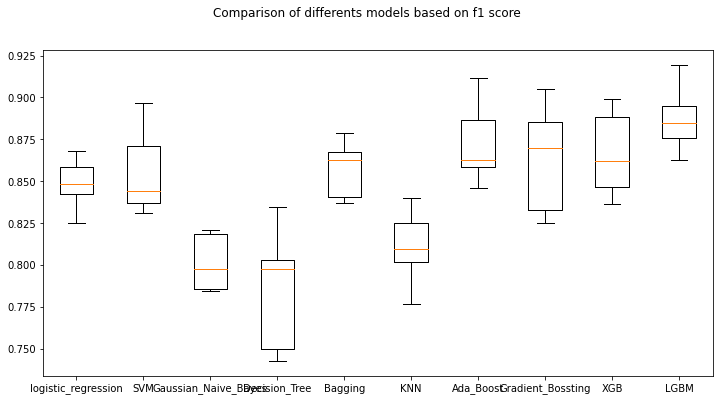

In [23]:
fig, ax = plt.subplots(figsize=(12,6))
ax.boxplot(f1_scores)
ax.set_xticklabels(names)
fig.suptitle('Comparison of differents models based on f1 score')
plt.show()

# PCA

In [24]:
pca = PCA(n_components = 20, random_state = seed)
pca.fit(df_scaled)

print(f'Variance ratios are : \n \n {pca.explained_variance_ratio_} \n')
print(f'Sum of variance ratios is  : {pca.explained_variance_ratio_.sum()}')

Variance ratios are : 
 
 [0.12961998 0.09390046 0.08252524 0.04290164 0.03566432 0.0299512
 0.02510273 0.02214611 0.02035206 0.0182389  0.01767102 0.01495244
 0.01306856 0.01272897 0.01267692 0.01167645 0.01068159 0.01058348
 0.00949644 0.00935444] 

Sum of variance ratios is  : 0.6232929507468545


In [25]:
def plot_cum_variance(pca_transformer):

    plt.bar(range(0,len(pca_transformer.explained_variance_ratio_)), pca_transformer.explained_variance_ratio_, alpha=0.5, align='center', label='Individual explained                                      variance')
    plt.step(range(0,len(np.cumsum(pca_transformer.explained_variance_ratio_))), np.cumsum(pca_transformer.explained_variance_ratio_), where='mid',label='Cumulative                                         explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal component index')
    plt.legend(loc='upper right')
    plt.tight_layout()
    plt.show()

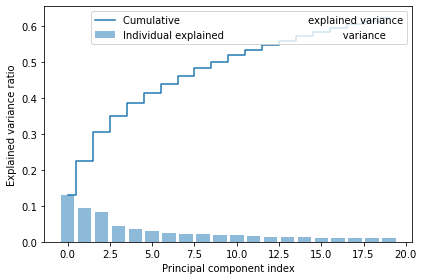

In [26]:
plot_cum_variance(pca)

In [27]:
def define_n_component_pca(data, percentage):


    """
    This function reduce dimensionality of a dataset by increasing principal components from 2 to x where x is the number of components to reach an user
    specific percent of explained variance.

    data : The dataset of which the dimensionality will be reduced
    percentage : the minimum percentage of explained variance to reach
    """

    n_comp = 2
    n_comp_optimal = True
    pca = PCA(n_components = n_comp, random_state = seed)
    pca.fit(data)
    current_percentage = np.sum(pca.explained_variance_ratio_)

    while n_comp_optimal : 

        # print(current_percentage)

        if current_percentage > percentage : 

            pca = PCA(n_components = n_comp, random_state = seed)
            pca.fit(data)
            # print(f'Number of principal component is : {n_comp}, with a cumulative variance of : {np.sum(pca.explained_variance_ratio_)}')
            n_comp_optimal = False
            

        else :

            # print('Adding one more component')
            n_comp += 1
            pca = PCA( n_components = n_comp, random_state = seed)
            pca.fit(data)
            current_percentage = np.sum(pca.explained_variance_ratio_)

        
    print(f'Number of principal component is : {n_comp}, with a cumulative variance of : {np.sum(pca.explained_variance_ratio_)}')
    return pca



In [ ]:
optimised_pca = define_n_component_pca(df_scaled, 0.8)
plot_cum_variance(optimised_pca)

In [30]:
df_scaled_pca = optimised_pca.fit_transform(df_scaled)

print(f'PCA reduction returns a dataset compressed and scaled of shape : {df_scaled_pca.shape}')

PCA reduction returns a dataset compressed and scaled of shape : (756, 61)


In [31]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(df_scaled_pca, labels, test_size = split_rate, random_state = seed, stratify = labels)

print(f'Shape of X_train_pca : {X_train_pca.shape}')
print(f'Shape of y_train_pca : {y_train_pca.shape}')

print(f'Shape of X_test_pca : {X_test_pca.shape}')
print(f'Shape of y_train_pca : {y_test_pca.shape}')

Shape of X_train_pca : (604, 61)
Shape of y_train_pca : (604,)
Shape of X_test_pca : (152, 61)
Shape of y_train_pca : (152,)


## Training models


### Logistic Regression

In [96]:
LR_PCA_classifier = LogisticRegression(random_state = seed)
scoring = ['accuracy','balanced_accuracy', 'f1','roc_auc']

LR_PCA_parameters = [{ 'penalty' : ['l1','l2'],
                       'class_weight' : [None, 'balanced'],
                       'C' : [0.01,0.1,1.0,2.0,5.0,10.0],
                    'solver' : ['liblinear','newton-cg','lbfgs','saga'],
                    'max_iter' : [100,200,500]}]

LR_PCA_grid_search = GridSearchCV(estimator = LR_PCA_classifier, param_grid = LR_PCA_parameters, scoring = 'accuracy', cv = 5, n_jobs = n_cores, verbose = 0)
LR_PCA_grid_search = LR_PCA_grid_search.fit(X_train_pca, y_train_pca)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
/home/sebastien/miniconda3/envs/Projets/lib/python3.7/site-packages/sklearn/model_selection/_search.py:925: UserWarning:

One or more of the test scores are non-finite: [0.72519284        nan        nan 0.80958678 0.82283747 0.85601928
 0.85601928 0.84935262 0.72519284        nan        nan 0.80793388
 0.82283747 0.85601928 0.85601928 0.85931129 0.72519284        nan
        nan 0.80794766 0.82283747 0.85601928 0.85601928 0.85435262
 0.6638843         nan        nan 0.72190083 0.77650138 0.81789256
 0.81789256 0.78973829 0.6638843         nan        nan 0.73516529
 0.77650138 0.81789256 0.81789256 0.80628099 0.6638843         nan
        nan 0.73681818 0.77650138 0.81789256 0.81789256 0.81789256
 0.85433884        nan        nan 0.84107438 0.84275482 0.84439394
 0.84439394 0.8361157  0.85433884        nan        nan 0.8526584
 0.84275482 0.84439394 0.84439394 0.84440771 0.85433884        nan
        nan 0.85599174 0.842754

In [98]:
print(f'Best logistic regressor is : {LR_PCA_grid_search.best_estimator_}, \n  with a score of : {LR_PCA_grid_search.best_score_}')


y_pred_LR_PCA =  LR_PCA_grid_search.best_estimator_.predict(X_test_pca)

cm = confusion_matrix(y_test_pca, y_pred_LR_PCA) 
print (cm)

print(classification_report(y_test,y_pred_LR_PCA))
print("Accuracy:",accuracy_score(y_test, y_pred_LR_PCA)*100)

Best logistic regressor is : LogisticRegression(C=0.01, max_iter=200, random_state=42, solver='saga'), 
  with a score of : 0.8593112947658403
[[ 25  14]
 [ 10 103]]
              precision    recall  f1-score   support

           0       0.71      0.64      0.68        39
           1       0.88      0.91      0.90       113

    accuracy                           0.84       152
   macro avg       0.80      0.78      0.79       152
weighted avg       0.84      0.84      0.84       152

Accuracy: 84.21052631578947


### SVM

In [99]:
SVM_PCA_classifier = SVC(random_state = seed)
scoring = ['accuracy','balanced_accuracy', 'f1','roc_auc']

SVM_PCA_parameters = [{ 'kernel' : ['linear','poly','rbf','sigmoid'],
                       'class_weight' : [None, 'balanced'],
                    'C' : [0.01,0.1,1.0,2.0,5.0,10.0],
                    'decision_function_shape' : ['ovo','ovr']}]

SVM_PCA_grid_search = GridSearchCV(estimator = SVM_PCA_classifier, param_grid = SVM_PCA_parameters, scoring = 'accuracy', cv = 5, n_jobs = n_cores, verbose = 4)
SVM_PCA_grid_search = SVM_PCA_grid_search.fit(X_train_pca, y_train_pca)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


In [100]:
print(f'Best SVM_PCA is : {SVM_PCA_grid_search.best_estimator_}, \n  with a score of : {SVM_PCA_grid_search.best_score_}')

y_pred_SVM_PCA =  SVM_PCA_grid_search.best_estimator_.predict(X_test_pca)

cm = confusion_matrix(y_test_pca, y_pred_SVM_PCA) 
print (cm)

print(classification_report(y_test_pca,y_pred_SVM_PCA))
print("Accuracy:",accuracy_score(y_test, y_pred_SVM_PCA)*100)

Best SVM_PCA is : SVC(C=10.0, decision_function_shape='ovo', random_state=42), 
  with a score of : 0.8841046831955921
[[ 27  12]
 [  5 108]]
              precision    recall  f1-score   support

           0       0.84      0.69      0.76        39
           1       0.90      0.96      0.93       113

    accuracy                           0.89       152
   macro avg       0.87      0.82      0.84       152
weighted avg       0.89      0.89      0.88       152

Accuracy: 88.81578947368422


### Gaussian Naive Bayes

In [101]:
GNB_PCA_classifier = GaussianNB()
GNB_PCA_grid_search = GNB_PCA_classifier.fit(X_train_pca, y_train_pca)

In [102]:
y_pred_GNB_PCA =  GNB_PCA_classifier.predict(X_test_pca)

cm = confusion_matrix(y_test_pca, y_pred_GNB_PCA) 
print (cm)

print(classification_report(y_test_pca,y_pred_GNB_PCA))
print("Accuracy:",accuracy_score(y_test_pca, y_pred_GNB_PCA)*100)

[[ 10  29]
 [  7 106]]
              precision    recall  f1-score   support

           0       0.59      0.26      0.36        39
           1       0.79      0.94      0.85       113

    accuracy                           0.76       152
   macro avg       0.69      0.60      0.61       152
weighted avg       0.73      0.76      0.73       152

Accuracy: 76.31578947368422


### Decision Tree

In [103]:
DT_PCA_classifier = DecisionTreeClassifier(random_state = seed)
scoring = ['accuracy','balanced_accuracy', 'f1','roc_auc']

DT_PCA_parameters = [{ 'criterion' : ['gini','entropy'],
                    'splitter' : ['best','random'],
                    'class_weight' : [None, 'balanced'],
                    'max_depth' : [10,20,50,100,1000],
                    'min_samples_split' : [10,15,20,50],
                    'max_features' : ['auto', 'sqrt', 'log2']
                    }]

DT_PCA_grid_search = GridSearchCV(estimator = DT_PCA_classifier, param_grid = DT_PCA_parameters, scoring = 'accuracy', cv = 5, n_jobs = n_cores, verbose = 4)
DT_PCA_grid_search = DT_PCA_grid_search.fit(X_train_pca, y_train_pca)
print('DT_PCA trained')

Fitting 5 folds for each of 480 candidates, totalling 2400 fits
DT_PCA trained


In [104]:
print(f'Best Decison Tree is : {DT_PCA_grid_search.best_estimator_}, \n  with a score of : {DT_PCA_grid_search.best_score_}')
print('\n')

y_pred_DT_PCA =  DT_PCA_grid_search.best_estimator_.predict(X_test_pca)

cm = confusion_matrix(y_test_pca, y_pred_DT_PCA) 
print (cm)

print(classification_report(y_test_pca, y_pred_DT_PCA))
print("Accuracy:",accuracy_score(y_test_pca, y_pred_DT_PCA)*100)

Best Decison Tree is : DecisionTreeClassifier(criterion='entropy', max_depth=20, max_features='log2',
                       min_samples_split=10, random_state=42,
                       splitter='random'), 
  with a score of : 0.7566666666666666


[[ 15  24]
 [ 10 103]]
              precision    recall  f1-score   support

           0       0.60      0.38      0.47        39
           1       0.81      0.91      0.86       113

    accuracy                           0.78       152
   macro avg       0.71      0.65      0.66       152
weighted avg       0.76      0.78      0.76       152

Accuracy: 77.63157894736842


### Random Forest

In [105]:
RF_PCA_classifier = RandomForestClassifier(random_state = seed)
scoring = ['accuracy','balanced_accuracy', 'f1','roc_auc']

RF_PCA_parameters = [{ 'n_estimators' : [10,20,50,100,250,500],
                    'criterion' : ['gini', 'entropy'],
                    'class_weight' : [None, 'balanced'],
                    'max_depth' : [10,20,50,100,1000],
                    'min_samples_split' : [10,15,20,50],
                    'max_features' : ['auto', 'sqrt', 'log2']
                    }]

RF_PCA_grid_search = GridSearchCV(estimator = RF_PCA_classifier, param_grid = RF_PCA_parameters, scoring = 'accuracy', cv = 5, n_jobs = n_cores, verbose = 4)
RF_PCA_grid_search = RF_PCA_grid_search.fit(X_train_pca, y_train_pca)
print('RF_PCA trained')


Fitting 5 folds for each of 1440 candidates, totalling 7200 fits
RF_PCA trained


In [64]:
print(f'Best Random Forest is : {RF_PCA_grid_search.best_estimator_}, \n  with a score of : {RF_PCA_grid_search.best_score_}')
print('\n')

y_pred_RF_PCA =  RF_PCA_grid_search.best_estimator_.predict(X_test_pca)

cm = confusion_matrix(y_test_pca, y_pred_RF_PCA) 
print (cm)

print(classification_report(y_test_pca,y_pred_RF_PCA))
print("Accuracy:",accuracy_score(y_test_pca, y_pred_RF_PCA)*100)

Best Random Forest is : RandomForestClassifier(max_depth=10, min_samples_split=10, n_estimators=250,
                       random_state=42), 
  with a score of : 0.8327961432506887


[[ 19  20]
 [  0 113]]
              precision    recall  f1-score   support

           0       1.00      0.49      0.66        39
           1       0.85      1.00      0.92       113

    accuracy                           0.87       152
   macro avg       0.92      0.74      0.79       152
weighted avg       0.89      0.87      0.85       152

Accuracy: 86.8421052631579


### Bagging Classifier

In [106]:

BG_PCA_classifier = BaggingClassifier(random_state = seed)
scoring = ['accuracy','balanced_accuracy', 'f1','roc_auc']

BG_PCA_parameters = [{ 'n_estimators' : [10,20,50,100,250,500],
                    'max_features' : [10,20,50,100]
                    }]

BG_PCA_grid_search = GridSearchCV(estimator = BG_PCA_classifier, param_grid = BG_PCA_parameters, scoring = 'accuracy', cv = 5, n_jobs = n_cores, verbose = 4)
BG_PCA_grid_search = BG_PCA_grid_search.fit(X_train_pca, y_train_pca)
print('Bagging Classifier trained ! ')

Fitting 5 folds for each of 24 candidates, totalling 120 fits
/home/sebastien/miniconda3/envs/Projets/lib/python3.7/site-packages/sklearn/model_selection/_search.py:925: UserWarning:

One or more of the test scores are non-finite: [0.76650138 0.77815427 0.78307163 0.78476584 0.78643251 0.78479339
 0.79965565 0.80633609 0.82455923 0.82453168 0.81958678 0.81790634
 0.82955923 0.83279614 0.83775482 0.83775482 0.84604683 0.84603306
        nan        nan        nan        nan        nan        nan]

Bagging Classifier trained ! 


In [108]:
print(f'Best BAgging Classifier is : {BG_PCA_grid_search.best_estimator_}, \n  with a score of : {BG_PCA_grid_search.best_score_}')
print('\n')

y_pred_BG_PCA =  BG_PCA_grid_search.best_estimator_.predict(X_test_pca)

cm = confusion_matrix(y_test_pca, y_pred_BG_PCA) 
print (cm)

print(classification_report(y_test_pca,y_pred_BG_PCA))
print("Accuracy:",accuracy_score(y_test_pca, y_pred_BG_PCA)*100)

Best BAgging Classifier is : BaggingClassifier(max_features=50, n_estimators=250, random_state=42), 
  with a score of : 0.8460468319559228


[[ 21  18]
 [  4 109]]
              precision    recall  f1-score   support

           0       0.84      0.54      0.66        39
           1       0.86      0.96      0.91       113

    accuracy                           0.86       152
   macro avg       0.85      0.75      0.78       152
weighted avg       0.85      0.86      0.84       152

Accuracy: 85.52631578947368


### KNN

In [110]:
KNN_PCA_classifier = KNeighborsClassifier()
scoring = ['accuracy','balanced_accuracy', 'f1','roc_auc']

KNN_PCA_parameters = [{ 'n_neighbors' : [10,20,50,75],
                    'weights' : ['uniform','distance'],
                    'algorithm' : ['auto']
                    }]

KNN_PCA_grid_search = GridSearchCV(estimator = KNN_PCA_classifier, param_grid = KNN_PCA_parameters, scoring = 'accuracy', cv = 5, n_jobs = n_cores, verbose = 4)
KNN_PCA_grid_search = KNN_PCA_grid_search.fit(X_train_pca, y_train_pca)
print('KNN_PCA trained ! ')

Fitting 5 folds for each of 8 candidates, totalling 40 fits
KNN_PCA trained ! 


In [111]:
print(f'Best KNN_PCA Classifier is : {KNN_PCA_grid_search.best_estimator_}, \n  with a score of : {KNN_PCA_grid_search.best_score_}')
print('\n')

y_pred_KNN_PCA =  KNN_PCA_grid_search.best_estimator_.predict(X_test_pca)

cm = confusion_matrix(y_test_pca, y_pred_KNN_PCA) 
print (cm)

print(classification_report(y_test_pca,y_pred_KNN_PCA))
print("Accuracy:",accuracy_score(y_test_pca, y_pred_KNN_PCA)*100)

Best KNN_PCA Classifier is : KNeighborsClassifier(n_neighbors=10, weights='distance'), 
  with a score of : 0.8444490358126722


[[ 20  19]
 [  3 110]]
              precision    recall  f1-score   support

           0       0.87      0.51      0.65        39
           1       0.85      0.97      0.91       113

    accuracy                           0.86       152
   macro avg       0.86      0.74      0.78       152
weighted avg       0.86      0.86      0.84       152

Accuracy: 85.52631578947368


### Ada Boost

In [113]:
ADAB_PCA_classifier = AdaBoostClassifier(random_state = seed)
scoring = ['accuracy','balanced_accuracy', 'f1','roc_auc']

ADAB_PCA_parameters = [{ 'n_estimators' : [10,20,50,75,100,250],
                    'learning_rate' : [0.001,0.01,0.1,1.0]                    }]

ADAB_PCA_grid_search = GridSearchCV(estimator = ADAB_PCA_classifier, param_grid = ADAB_PCA_parameters, scoring = 'accuracy', cv = 5, n_jobs = n_cores, verbose = 4)
ADAB_PCA_grid_search = ADAB_PCA_grid_search.fit(X_train_pca, y_train_pca)
print('ADAB_PCA trained ! ')

Fitting 5 folds for each of 24 candidates, totalling 120 fits
ADAB_PCA trained ! 


In [114]:
print(f'Best ADAB_PCA Classifier is : {ADAB_PCA_grid_search.best_estimator_}, \n  with a score of : {ADAB_PCA_grid_search.best_score_}')
print('\n')

y_pred_ADAB_PCA =  ADAB_PCA_grid_search.best_estimator_.predict(X_test_pca)

cm = confusion_matrix(y_test_pca, y_pred_ADAB_PCA) 
print (cm)

print(classification_report(y_test_pca, y_pred_ADAB_PCA))
print("Accuracy:",accuracy_score(y_test_pca, y_pred_ADAB_PCA)*100)

Best ADAB_PCA Classifier is : AdaBoostClassifier(learning_rate=0.1, n_estimators=250, random_state=42), 
  with a score of : 0.8195041322314051


[[ 19  20]
 [  1 112]]
              precision    recall  f1-score   support

           0       0.95      0.49      0.64        39
           1       0.85      0.99      0.91       113

    accuracy                           0.86       152
   macro avg       0.90      0.74      0.78       152
weighted avg       0.87      0.86      0.84       152

Accuracy: 86.18421052631578


### Gradient Bossting Classifier

In [116]:
GB_PCA_classifier = GradientBoostingClassifier(random_state = seed)
scoring = ['accuracy','balanced_accuracy', 'f1','roc_auc']

GB_PCA_parameters = [{ 'n_estimators' : [10,20,50,75,100,250],

                    'learning_rate' : [0.001,0.01,0.1,1.0],
                    'criterion' : ['friedman_mse','mse','mae']
                    }]

GB_PCA_grid_search = GridSearchCV(estimator = GB_PCA_classifier, param_grid = GB_PCA_parameters, scoring = 'accuracy', cv = 5, n_jobs = n_cores, verbose = 4)
GB_PCA_grid_search = GB_PCA_grid_search.fit(X_train_pca, y_train_pca)
print('GB_PCA trained ! ')

Fitting 5 folds for each of 72 candidates, totalling 360 fits
GB_PCA trained ! 


In [117]:
print(f'Best GB_PCA Classifier is : {GB_PCA_grid_search.best_estimator_}, \n  with a score of : {GB_PCA_grid_search.best_score_}')
print('\n')

y_pred_GB_PCA =  GB_PCA_grid_search.best_estimator_.predict(X_test_pca)

cm = confusion_matrix(y_test_pca, y_pred_GB_PCA) 
print (cm)

print(classification_report(y_test_pca,y_pred_GB_PCA))
print("Accuracy:",accuracy_score(y_test_pca, y_pred_GB_PCA)*100)

Best GB_PCA Classifier is : GradientBoostingClassifier(learning_rate=1.0, n_estimators=250, random_state=42), 
  with a score of : 0.8493663911845729


[[ 26  13]
 [  5 108]]
              precision    recall  f1-score   support

           0       0.84      0.67      0.74        39
           1       0.89      0.96      0.92       113

    accuracy                           0.88       152
   macro avg       0.87      0.81      0.83       152
weighted avg       0.88      0.88      0.88       152

Accuracy: 88.1578947368421


### XGB Classifier

In [140]:
XGB_PCA_classifier = XGBClassifier(random_state = seed)
scoring = ['accuracy','balanced_accuracy', 'f1','roc_auc']

XGB_PCA_parameters = [{'nthread': [n_cores], #when use hyperthread, XGB_PCAoost may become slower
              'objective':['binary:logistic'],
              'class_weight' : [None, 'balanced'],
              'learning_rate': [0.001,0.05,0.1], #so called `eta` value
              'max_depth': [10,20,50,100],
              'min_child_weight': [10],
              'silent': [1],
              'subsample': [0.8,0.9,1.0],
              'colsample_bytree': [0.7],
              'n_estimators': [10,20,50,100], #number of trees, change it to 1000 for better results
              'missing':[-999],
              'seed': [seed]}]

XGB_PCA_grid_search = GridSearchCV(estimator = XGB_PCA_classifier, param_grid = XGB_PCA_parameters, scoring = 'accuracy', cv = 5, n_jobs = n_cores, verbose = 4)
XGB_PCA_grid_search = XGB_PCA_grid_search.fit(X_train_pca, y_train_pca)
print('XGB_PCA trained ! ')

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
[10:01:38] WARNING: ../src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[10:01:38] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGB_PCA trained ! 
/home/sebastien/miniconda3/envs/Projets/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode y

In [142]:
print(f'Best XGB_PCA Classifier is : {XGB_PCA_grid_search.best_estimator_}, \n  with a score of : {XGB_PCA_grid_search.best_score_}')
print('\n')

y_pred_XGB_PCA =  XGB_PCA_grid_search.best_estimator_.predict(X_test_pca)

cm = confusion_matrix(y_test_pca, y_pred_XGB_PCA) 
print (cm)

print(classification_report(y_test_pca, y_pred_XGB_PCA))
print("Accuracy:",accuracy_score(y_test_pca, y_pred_XGB_PCA)*100)

Best XGB_PCA Classifier is : XGBClassifier(base_score=0.5, booster='gbtree', class_weight=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.7,
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=10, min_child_weight=10, missing=-999,
              monotone_constraints='()', n_estimators=100, n_jobs=8, nthread=8,
              num_parallel_tree=1, random_state=42, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, seed=42, silent=1, subsample=1.0,
              tree_method='exact', validate_parameters=1, verbosity=None), 
  with a score of : 0.841115702479339


[[ 22  17]
 [  4 109]]
              precision    recall  f1-score   support

           0       0.85      0.56      0.68        39
           1       0.87      0.96      0.91       113

    accuracy                           0.86       152
   macro avg       0.86      0.76      0.79

#### LGBM CLassifier

In [143]:
LGBM_PCA_classifier = LGBMClassifier(random_state = seed)
scoring = ['accuracy','balanced_accuracy', 'f1','roc_auc']

LGBM_PCA_parameters = [{'boosting_type': ['gbdt','dart','goss'], #when use hyperthread, LGBM_PCAoost may become slower
               'class_weight' : [None, 'balanced'],
               'num_leaves':[50,75,100],
              'learning_rate': [0.05,0.1], #so called `eta` value
              'max_depth': [10,20,50,100],
              'n_estimators': [10,20,50,100], #number of trees, change it to 1000 for better results
            }]

LGBM_PCA_grid_search = GridSearchCV(estimator = LGBM_PCA_classifier, param_grid = LGBM_PCA_parameters, scoring = 'accuracy', cv = 5, n_jobs = n_cores, verbose = 4)
LGBM_PCA_grid_search = LGBM_PCA_grid_search.fit(X_train_pca, y_train_pca)
print('LGBM_PCA trained ! ')

Fitting 5 folds for each of 576 candidates, totalling 2880 fits
LGBM_PCA trained ! 


In [144]:
print(f'Best LGBM_PCA Classifier is : {LGBM_PCA_grid_search.best_estimator_}, \n  with a score of : {LGBM_PCA_grid_search.best_score_}')
print('\n')

y_pred_LGBM_PCA =  LGBM_PCA_grid_search.best_estimator_.predict(X_test_pca)

cm = confusion_matrix(y_test_pca, y_pred_LGBM_PCA) 
print (cm)

print(classification_report(y_test_pca, y_pred_LGBM_PCA))
print("Accuracy:",accuracy_score(y_test_pca, y_pred_LGBM_PCA)*100)

Best LGBM_PCA Classifier is : LGBMClassifier(max_depth=20, num_leaves=50, random_state=42), 
  with a score of : 0.8592837465564738


[[ 24  15]
 [  1 112]]
              precision    recall  f1-score   support

           0       0.96      0.62      0.75        39
           1       0.88      0.99      0.93       113

    accuracy                           0.89       152
   macro avg       0.92      0.80      0.84       152
weighted avg       0.90      0.89      0.89       152

Accuracy: 89.47368421052632


### Saving models

In [145]:
models_pca_dict = {
    'logistic_regression_pca' : LR_PCA_grid_search.best_estimator_,
    'SVM_pca' : SVM_PCA_grid_search.best_estimator_,
    'Gaussian_Naive_Bayes_pca' : GNB_PCA_classifier,
    'Decision_Tree_pca' : DT_PCA_grid_search.best_estimator_,
    'Bagging_pca' : BG_PCA_grid_search.best_estimator_,
    'KNN_pca' : KNN_PCA_grid_search.best_estimator_,
    'Ada_Boost_pca' : ADAB_PCA_grid_search.best_estimator_,
    'Gradient_Boosting_pca' : GB_PCA_grid_search.best_estimator_,
    'XGB_pca' : XGB_PCA_grid_search.best_estimator_,
    'LGBM_pca' : LGBM_PCA_grid_search.best_estimator_
    

}

# save the model to disk

for key, value in models_pca_dict.items():

    filename = str(os.getcwd()) + '/' +  key + '.sav'
    print(filename)
    pickle.dump(value, open(filename, 'wb'))


/home/sebastien/Bureau/Parkinsons_Disease_Classification/logistic_regression_pca.sav
/home/sebastien/Bureau/Parkinsons_Disease_Classification/SVM_pca.sav
/home/sebastien/Bureau/Parkinsons_Disease_Classification/Gaussian_Naive_Bayes_pca.sav
/home/sebastien/Bureau/Parkinsons_Disease_Classification/Decision_Tree_pca.sav
/home/sebastien/Bureau/Parkinsons_Disease_Classification/Bagging_pca.sav
/home/sebastien/Bureau/Parkinsons_Disease_Classification/KNN_pca.sav
/home/sebastien/Bureau/Parkinsons_Disease_Classification/Ada_Boost_pca.sav
/home/sebastien/Bureau/Parkinsons_Disease_Classification/Gradient_Boosting_pca.sav
/home/sebastien/Bureau/Parkinsons_Disease_Classification/XGB_pca.sav
/home/sebastien/Bureau/Parkinsons_Disease_Classification/LGBM_pca.sav


### Reloading models

In [32]:
models_pca_path_dict = {
    'logistic_regression_pca' : '/home/sebastien/Bureau/Parkinsons_Disease_Classification/logistic_regression_pca.sav',
    'SVM_pca' : '/home/sebastien/Bureau/Parkinsons_Disease_Classification/SVM_pca.sav',
    'Gaussian_Naive_Bayes_pca' : '/home/sebastien/Bureau/Parkinsons_Disease_Classification/Gaussian_Naive_Bayes_pca.sav' ,
    'Decision_Tree_pca' : '/home/sebastien/Bureau/Parkinsons_Disease_Classification/Decision_Tree_pca.sav',
    'Bagging_pca' : '/home/sebastien/Bureau/Parkinsons_Disease_Classification/Bagging_pca.sav',
    'KNN_pca' : '/home/sebastien/Bureau/Parkinsons_Disease_Classification/KNN_pca.sav',
    'Ada_Boost_pca' : '/home/sebastien/Bureau/Parkinsons_Disease_Classification/Ada_Boost_pca.sav',
    'Gradient_Boosting_pca' : '/home/sebastien/Bureau/Parkinsons_Disease_Classification/Gradient_Boosting_pca.sav',
    'XGB_pca' : '/home/sebastien/Bureau/Parkinsons_Disease_Classification/XGB_pca.sav',
    'LGBM_pca' : '/home/sebastien/Bureau/Parkinsons_Disease_Classification/LGBM_pca.sav'

}

models_pca_dict = {}

for key, value in models_pca_path_dict.items():
    print(key,value)

    try: 
        models_pca_dict[str(key)] = pickle.load(open(value, 'rb'))
        print('ok')
    except : 
        print('fail')
models_pca_dict

test = pickle.load(open('/home/sebastien/Bureau/Parkinsons_Disease_Classification/SVM_pca.sav','rb'))
print(test)

logistic_regression_pca /home/sebastien/Bureau/Parkinsons_Disease_Classification/logistic_regression_pca.sav
ok
SVM_pca /home/sebastien/Bureau/Parkinsons_Disease_Classification/SVM_pca.sav
ok
Gaussian_Naive_Bayes_pca /home/sebastien/Bureau/Parkinsons_Disease_Classification/Gaussian_Naive_Bayes_pca.sav
ok
Decision_Tree_pca /home/sebastien/Bureau/Parkinsons_Disease_Classification/Decision_Tree_pca.sav
ok
Bagging_pca /home/sebastien/Bureau/Parkinsons_Disease_Classification/Bagging_pca.sav
ok
KNN_pca /home/sebastien/Bureau/Parkinsons_Disease_Classification/KNN_pca.sav
ok
Ada_Boost_pca /home/sebastien/Bureau/Parkinsons_Disease_Classification/Ada_Boost_pca.sav
ok
Gradient_Boosting_pca /home/sebastien/Bureau/Parkinsons_Disease_Classification/Gradient_Boosting_pca.sav
ok
XGB_pca /home/sebastien/Bureau/Parkinsons_Disease_Classification/XGB_pca.sav
ok
LGBM_pca /home/sebastien/Bureau/Parkinsons_Disease_Classification/LGBM_pca.sav
ok
SVC(C=10.0, decision_function_shape='ovo', random_state=42)


## Model's Evaluation

In [33]:
cv_pca = StratifiedKFold(n_splits = 5, shuffle = True, random_state = seed)

f1_scores_pca = []
names_pca = []

for name, model in models_pca_dict.items():
    scores = cross_val_score(model, df_scaled, df['class'], scoring = 'f1_weighted', cv = cv_pca, n_jobs = n_cores)
    f1_mean = scores.mean()
    f1_std = scores.std()
    print(f"{name} : Mean ROC {f1_mean} STD:({f1_std})")
    f1_scores_pca.append(scores)
    names_pca.append(name)

print('Evaluation done !')

f1_scores_pca

logistic_regression_pca : Mean ROC 0.853965396461071 STD:(0.016702907091462244)
SVM_pca : Mean ROC 0.8660069418773318 STD:(0.028050424576622095)
Gaussian_Naive_Bayes_pca : Mean ROC 0.8014069190319318 STD:(0.0158060833576227)
Decision_Tree_pca : Mean ROC 0.7486007147953927 STD:(0.013171659582263708)
Bagging_pca : Mean ROC 0.853385449439438 STD:(0.020592576083660094)
KNN_pca : Mean ROC 0.810558093641611 STD:(0.021371073861328495)
Ada_Boost_pca : Mean ROC 0.8730101426603923 STD:(0.023420690420550075)
Gradient_Boosting_pca : Mean ROC 0.8750979122683287 STD:(0.020944310071141108)
XGB_pca : Mean ROC 0.8663978930833146 STD:(0.023988545671906853)
LGBM_pca : Mean ROC 0.88527659221068 STD:(0.022241878469474178)
Evaluation done !


[array([0.83921084, 0.85645873, 0.85424954, 0.88339766, 0.83651022]),
 array([0.92036011, 0.84575592, 0.85645873, 0.84431869, 0.86314126]),
 array([0.79760616, 0.78413648, 0.81868915, 0.82105801, 0.78554479]),
 array([0.73137094, 0.74604737, 0.7705378 , 0.74117854, 0.75386892]),
 array([0.87538044, 0.84575592, 0.82225899, 0.87707869, 0.84645321]),
 array([0.80959879, 0.8250783 , 0.80168619, 0.83969496, 0.77673223]),
 array([0.91154233, 0.86261736, 0.85847153, 0.88677723, 0.84564227]),
 array([0.88782116, 0.84635387, 0.88584132, 0.90093007, 0.85454314]),
 array([0.8990042 , 0.83610932, 0.84635387, 0.88825736, 0.8622647 ]),
 array([0.90524803, 0.84575592, 0.89711558, 0.90222519, 0.87603823])]

# Ploting results with PCA Compression

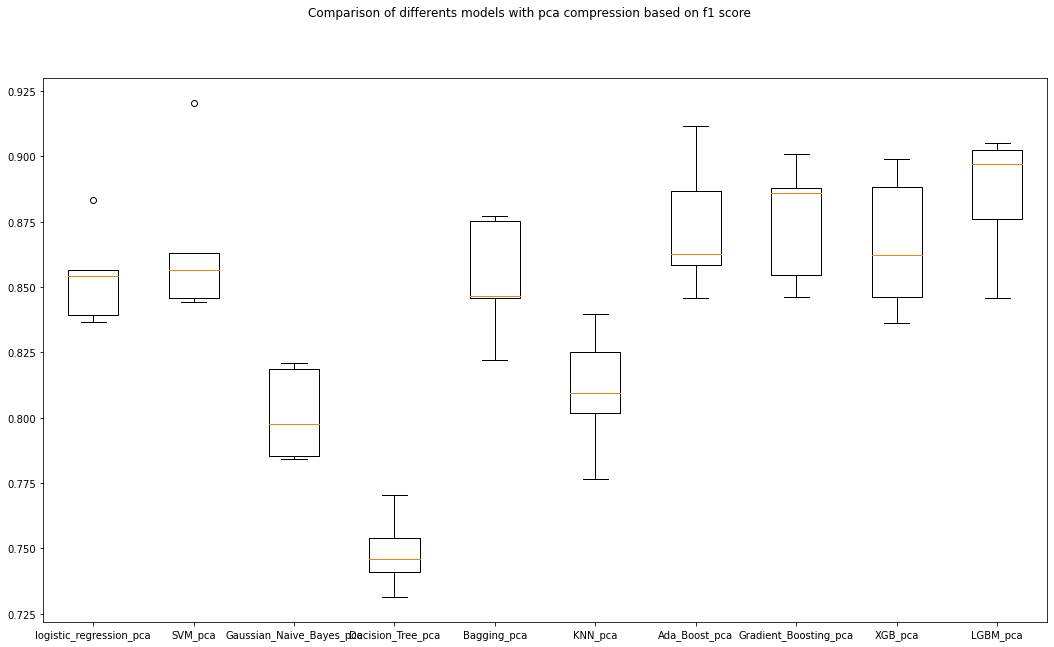

In [34]:
fig, ax = plt.subplots(figsize=(18,10))
ax.boxplot(f1_scores_pca)
ax.set_xticklabels(names_pca)
fig.suptitle('Comparison of differents models with pca compression based on f1 score')
plt.show()

## Neural Networks

In [155]:
tf.random.set_seed(seed) # Setting seed for reproductibility
tf_classes_weights = {
0 : classes_weights[0],
1 : classes_weights[1]
}

tf_classes_weights

{0: 1.96875, 1: 0.6702127659574468}

In [150]:
model = Sequential([

    tf.keras.layers.Input(shape = [X_train.shape[1]], dtype = tf.float32),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(256, activation = 'relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1024, activation = 'relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation = 'sigmoid')

])

model.compile(loss = 'binary_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [151]:
model.summary()


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 64)                48256     
_________________________________________________________________
batch_normalization_20 (Batc (None, 64)                256       
_________________________________________________________________
dropout_20 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_25 (Dense)             (None, 128)               8320      
_________________________________________________________________
batch_normalization_21 (Batc (None, 128)               512       
_________________________________________________________________
dropout_21 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_26 (Dense)             (None, 256)              

In [154]:
classes_weights

array([1.96875   , 0.67021277])

In [156]:
fBestModel = 'best_model.h5' 
early_stop = EarlyStopping(monitor='val_accuracy', patience=100, verbose=1, baseline = 0.90) 
best_model = ModelCheckpoint(fBestModel, verbose=0, save_best_only=True)

history = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs=500, 
          batch_size=62, verbose=True, callbacks=[best_model, early_stop], class_weight = tf_classes_weights)

 tf.data functions, please use `tf.data.experimental.enable.debug_mode()`.

10/10 [==============================] - 0s 39ms/step - loss: 1.0463 - accuracy: 0.5927 - val_loss: 0.6389 - val_accuracy: 0.7171
Epoch 2/500
10/10 [==============================] - 0s 36ms/step - loss: 0.7705 - accuracy: 0.6589 - val_loss: 0.7003 - val_accuracy: 0.5263
Epoch 3/500
10/10 [==============================] - 0s 37ms/step - loss: 0.6380 - accuracy: 0.7566 - val_loss: 0.6109 - val_accuracy: 0.6842
Epoch 4/500
10/10 [==============================] - 0s 37ms/step - loss: 0.6140 - accuracy: 0.7682 - val_loss: 0.4989 - val_accuracy: 0.7895
Epoch 5/500
10/10 [==============================] - 0s 38ms/step - loss: 0.5085 - accuracy: 0.7715 - val_loss: 0.4608 - val_accuracy: 0.8026
Epoch 6/500
10/10 [==============================] - 0s 33ms/step - loss: 0.3784 - accuracy: 0.8262 - val_loss: 0.4070 - val_accuracy: 0.8224
Epoch 7/500
10/10 [==============================] - 0s 33ms/step - loss: 0.4440 - a

In [157]:
score = model.evaluate(X_test, y_test, verbose=1)
print('Accuracy: ', score[1]*100)
print( 'loss:', score[0]*100)

5/5 [==============================] - 0s 7ms/step - loss: 0.5614 - accuracy: 0.8882
Accuracy:  88.81579041481018
loss: 56.13594651222229


In [158]:
prediction = model.predict(X_test)
prediction = (prediction > 0.5)


In [159]:
print(metrics.classification_report(y_test, prediction))


              precision    recall  f1-score   support

           0       0.74      0.87      0.80        39
           1       0.95      0.89      0.92       113

    accuracy                           0.89       152
   macro avg       0.85      0.88      0.86       152
weighted avg       0.90      0.89      0.89       152



In [160]:
fig = make_subplots(rows=1, cols=2, subplot_titles=("Accuracy", "loss"))

fig.add_trace(
go.Scatter(y = history.history['accuracy'], showlegend = True, name="Accuracy - Training",
                line_color='dimgray', legendgroup = 'Accuracy'),
row=1, col=1)
fig.add_trace(go.Scatter(y = history.history['val_accuracy'], showlegend = True, name="Accuracy - Validation",
                line_color='red', legendgroup = 'Accuracy'))

fig.add_trace(
go.Scatter(y = history.history['loss'], showlegend = True, name="Loss - Training",
                line_color='dimgray', legendgroup = 'Loss'),
row=1, col=2)
fig.add_trace(go.Scatter(y = history.history['val_loss'], showlegend = True, name="Loss - Validation",
                line_color='red', legendgroup = 'Loss'),row=1, col=2)

# Update xaxis properties
fig.update_xaxes(title_text="epochs", row=1, col=1)
fig.update_xaxes(title_text="epochs", row=1, col=2)



fig.update_layout(height=600, width=800, title_text="Model Results", title_x=0.5)
fig.show()


## Neural Network with PCA

In [161]:
model_pca = Sequential([

    tf.keras.layers.Input(shape = [X_train_pca.shape[1]], dtype = tf.float32),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(256, activation = 'relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1024, activation = 'relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation = 'sigmoid')

])

model_pca.compile(loss = 'binary_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

model_pca.summary()


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 64)                3968      
_________________________________________________________________
batch_normalization_25 (Batc (None, 64)                256       
_________________________________________________________________
dropout_25 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_31 (Dense)             (None, 128)               8320      
_________________________________________________________________
batch_normalization_26 (Batc (None, 128)               512       
_________________________________________________________________
dropout_26 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_32 (Dense)             (None, 256)              

In [163]:
fBestModel_pca = 'best_model_pca.h5' 
early_stop = EarlyStopping(monitor='val_accuracy', patience=100, verbose=1, baseline = 0.90) 
best_model_pca = ModelCheckpoint(fBestModel_pca, verbose=0, save_best_only=True)

history_pca = model_pca.fit(X_train_pca, y_train_pca, validation_data = (X_test_pca, y_test_pca), epochs=500, 
          batch_size = 61, verbose=True, callbacks=[best_model_pca, early_stop], class_weight = tf_classes_weights)

=======================] - 0s 37ms/step - loss: 0.0880 - accuracy: 0.9685 - val_loss: 0.2840 - val_accuracy: 0.9211
Epoch 84/500
10/10 [==============================] - 0s 37ms/step - loss: 0.0583 - accuracy: 0.9785 - val_loss: 0.2879 - val_accuracy: 0.9276
Epoch 85/500
10/10 [==============================] - 0s 36ms/step - loss: 0.0782 - accuracy: 0.9669 - val_loss: 0.3522 - val_accuracy: 0.9079
Epoch 86/500
10/10 [==============================] - 0s 33ms/step - loss: 0.1204 - accuracy: 0.9520 - val_loss: 0.3401 - val_accuracy: 0.9079
Epoch 87/500
10/10 [==============================] - 0s 36ms/step - loss: 0.0685 - accuracy: 0.9785 - val_loss: 0.3816 - val_accuracy: 0.8882
Epoch 88/500
10/10 [==============================] - 0s 35ms/step - loss: 0.0554 - accuracy: 0.9801 - val_loss: 0.4522 - val_accuracy: 0.9013
Epoch 89/500
10/10 [==============================] - 0s 33ms/step - loss: 0.0646 - accuracy: 0.9702 - val_loss: 0.4600 - val_accuracy: 0.9079
Epoch 90/500
10/10 [======

In [164]:
score_pca = model_pca.evaluate(X_test_pca, y_test_pca, verbose=1)
print('Accuracy: ', score_pca[1]*100)
print( 'loss:', score_pca[0]*100)

5/5 [==============================] - 0s 6ms/step - loss: 0.4033 - accuracy: 0.9145
Accuracy:  91.44737124443054
loss: 40.333759784698486


In [165]:
prediction_pca = model_pca.predict(X_test_pca)
prediction_pca = (prediction_pca > 0.5)


In [166]:
print(metrics.classification_report(y_test_pca, prediction_pca))


              precision    recall  f1-score   support

           0       0.84      0.82      0.83        39
           1       0.94      0.95      0.94       113

    accuracy                           0.91       152
   macro avg       0.89      0.88      0.89       152
weighted avg       0.91      0.91      0.91       152



In [167]:
fig = make_subplots(rows=1, cols=2, subplot_titles=("Accuracy", "loss"))

fig.add_trace(
go.Scatter(y = history_pca.history['accuracy'], showlegend = True, name="Accuracy - Training",
                line_color='dimgray', legendgroup = 'Accuracy'),
row=1, col=1)
fig.add_trace(go.Scatter(y = history_pca.history['val_accuracy'], showlegend = True, name="Accuracy - Validation",
                line_color='red', legendgroup = 'Accuracy'))

fig.add_trace(
go.Scatter(y = history_pca.history['loss'], showlegend = True, name="Loss - Training",
                line_color='dimgray', legendgroup = 'Loss'),
row=1, col=2)
fig.add_trace(go.Scatter(y = history_pca.history['val_loss'], showlegend = True, name="Loss - Validation",
                line_color='red', legendgroup = 'Loss'),row=1, col=2)

# Update xaxis properties
fig.update_xaxes(title_text="epochs", row=1, col=1)
fig.update_xaxes(title_text="epochs", row=1, col=2)



fig.update_layout(height=600, width=800, title_text="Model Results with pca compression", title_x=0.5)
fig.show()


### Auto ML comparison

In [169]:
automl_model = autosklearn.classification.AutoSklearnClassifier(n_jobs = n_cores) #time_left_for_this_task=300
automl_model.fit(X_train, y_train)

/home/sebastien/miniconda3/envs/Projets/lib/python3.7/site-packages/distributed/node.py:164: UserWarning:

Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 36081 instead



AutoSklearnClassifier(n_jobs=8, per_run_time_limit=2880)

In [184]:
automl_model.get_params()

{'dask_client': None,
 'delete_output_folder_after_terminate': True,
 'delete_tmp_folder_after_terminate': True,
 'disable_evaluator_output': False,
 'ensemble_nbest': 50,
 'ensemble_size': 50,
 'exclude_estimators': None,
 'exclude_preprocessors': None,
 'get_smac_object_callback': None,
 'include_estimators': None,
 'include_preprocessors': None,
 'initial_configurations_via_metalearning': 25,
 'load_models': True,
 'logging_config': None,
 'max_models_on_disc': 50,
 'memory_limit': 3072,
 'metadata_directory': None,
 'metric': None,
 'n_jobs': 8,
 'output_folder': None,
 'per_run_time_limit': 2880,
 'resampling_strategy': 'holdout',
 'resampling_strategy_arguments': None,
 'scoring_functions': None,
 'seed': 1,
 'smac_scenario_args': None,
 'time_left_for_this_task': 3600,
 'tmp_folder': None}

In [174]:
y_hat = automl_model.predict(X_test)
print("Accuracy score", sklearn.metrics.accuracy_score(y_test, y_hat))

print(automl_model.sprint_statistics())

Accuracy score 0.9210526315789473
auto-sklearn results:
  Dataset name: 8851d788-cdb8-11eb-9e70-f5c5b34e8243
  Metric: accuracy
  Best validation score: 0.965000
  Number of target algorithm runs: 314
  Number of successful target algorithm runs: 228
  Number of crashed target algorithm runs: 55
  Number of target algorithms that exceeded the time limit: 11
  Number of target algorithms that exceeded the memory limit: 20



In [175]:
automl_model.cv_results_['params']

_nearest_neighbors:p': 1,
  'classifier:k_nearest_neighbors:weights': 'uniform',
  'data_preprocessing:categorical_transformer:category_coalescence:minority_coalescer:minimum_fraction': 0.00881821600025882,
  'feature_preprocessor:select_rates_classification:alpha': 0.16663126507077386,
  'feature_preprocessor:select_rates_classification:score_func': 'f_classif',
  'feature_preprocessor:select_rates_classification:mode': 'fpr'},
 {'balancing:strategy': 'weighting',
  'classifier:__choice__': 'sgd',
  'data_preprocessing:categorical_transformer:categorical_encoding:__choice__': 'no_encoding',
  'data_preprocessing:categorical_transformer:category_coalescence:__choice__': 'no_coalescense',
  'data_preprocessing:numerical_transformer:imputation:strategy': 'most_frequent',
  'data_preprocessing:numerical_transformer:rescaling:__choice__': 'quantile_transformer',
  'feature_preprocessor:__choice__': 'pca',
  'classifier:sgd:alpha': 0.0001125127040554992,
  'classifier:sgd:average': 'True',


In [186]:
pickle.dump(automl_model, open('automl_model.sav', 'wb'))

In [188]:
automl_model_pca = autosklearn.classification.AutoSklearnClassifier(n_jobs = n_cores) #time_left_for_this_task=300
automl_model_pca.fit(X_train_pca, y_train_pca)

Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 39065 instead


AutoSklearnClassifier(n_jobs=8, per_run_time_limit=2880)

In [189]:
pickle.dump(automl_model_pca, open('automl_model_pca.sav', 'wb'))

In [191]:
y_hat_pca = automl_model_pca.predict(X_test_pca)
print("Accuracy score", sklearn.metrics.accuracy_score(y_test_pca, y_hat_pca))

print(automl_model_pca.sprint_statistics())

Accuracy score 0.875
auto-sklearn results:
  Dataset name: d6197ae2-cdc4-11eb-9e70-f5c5b34e8243
  Metric: accuracy
  Best validation score: 0.930000
  Number of target algorithm runs: 297
  Number of successful target algorithm runs: 245
  Number of crashed target algorithm runs: 41
  Number of target algorithms that exceeded the time limit: 10
  Number of target algorithms that exceeded the memory limit: 1



### Auto ML using Auto ML

In [ ]:
automl = AutoML(total_time_limit = 60*60, n_jobs = n_cores, random_state = seed, verbose = 1, optuna_verbose = True) # total train limit = 1 hour, model_time_limit=30*60,
automl.fit(X_train, y_train)


In [ ]:
pickle.dump(automl, open('automl.sav', 'wb'))